In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Question 1
Plot a heatmap of Pearson correlation matrix of dataset columns. Report which
features have the highest absolute correlation with the target variable and what
that implies.

In [2]:
dfBike = pd.read_csv('bike-share-dataset/day.csv')
dfVid = pd.read_csv('online-video-dataset/transcoding_mesurment.tsv', sep='\t')

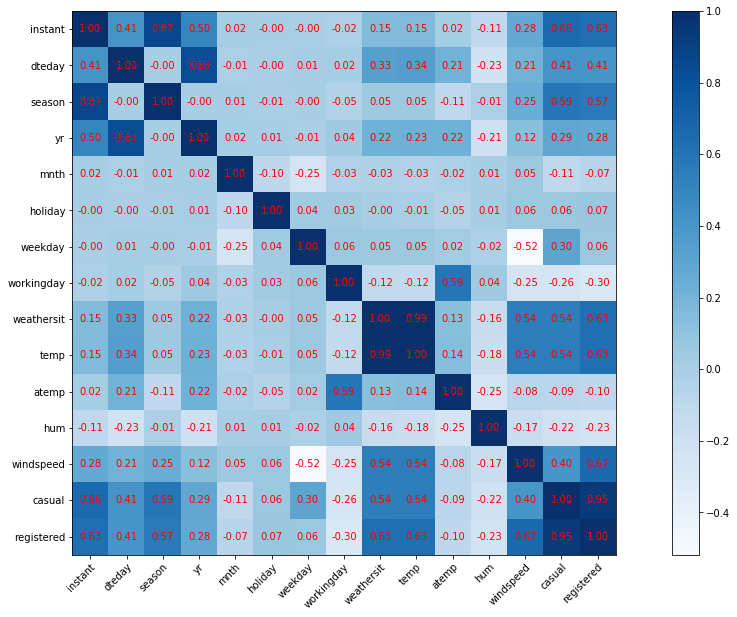

In [3]:
bikeCorrelation = dfBike.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(20,10))

ax.set_xticks(np.arange(len(bikeCorrelation.iloc[0])))
ax.set_yticks(np.arange(len(bikeCorrelation.iloc[0])))

ax.set_xticklabels(dfBike.columns)
ax.set_yticklabels(dfBike.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(bikeCorrelation.iloc[0])):
    for j in range(len(bikeCorrelation.iloc[0])):
        ax.text(j, i, "{:.2f}".format(bikeCorrelation.iloc[i][j]), ha="center", va="center", color="r")

im = ax.imshow(bikeCorrelation, cmap='Blues', interpolation='nearest')
fig.colorbar(im, orientation='vertical')
plt.show()

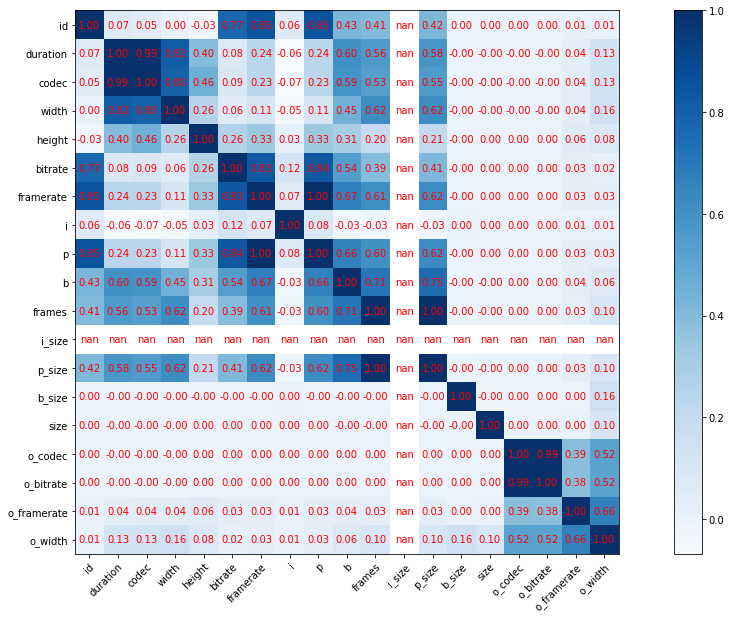

In [4]:
videoCorrelation = dfVid.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(20,10))

ax.set_xticks(np.arange(len(videoCorrelation.iloc[0])))
ax.set_yticks(np.arange(len(videoCorrelation.iloc[0])))

ax.set_xticklabels(dfVid.columns)
ax.set_yticklabels(dfVid.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(videoCorrelation.iloc[0])):
    for j in range(len(videoCorrelation.iloc[0])):
        ax.text(j, i, "{:.2f}".format(videoCorrelation.iloc[i][j]), ha="center", va="center", color="r")

im = ax.imshow(videoCorrelation, cmap='Blues', interpolation='nearest')
fig.colorbar(im, orientation='vertical')
plt.show()

### Q2
Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?

D:\Anaconda3\envs\EE219\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


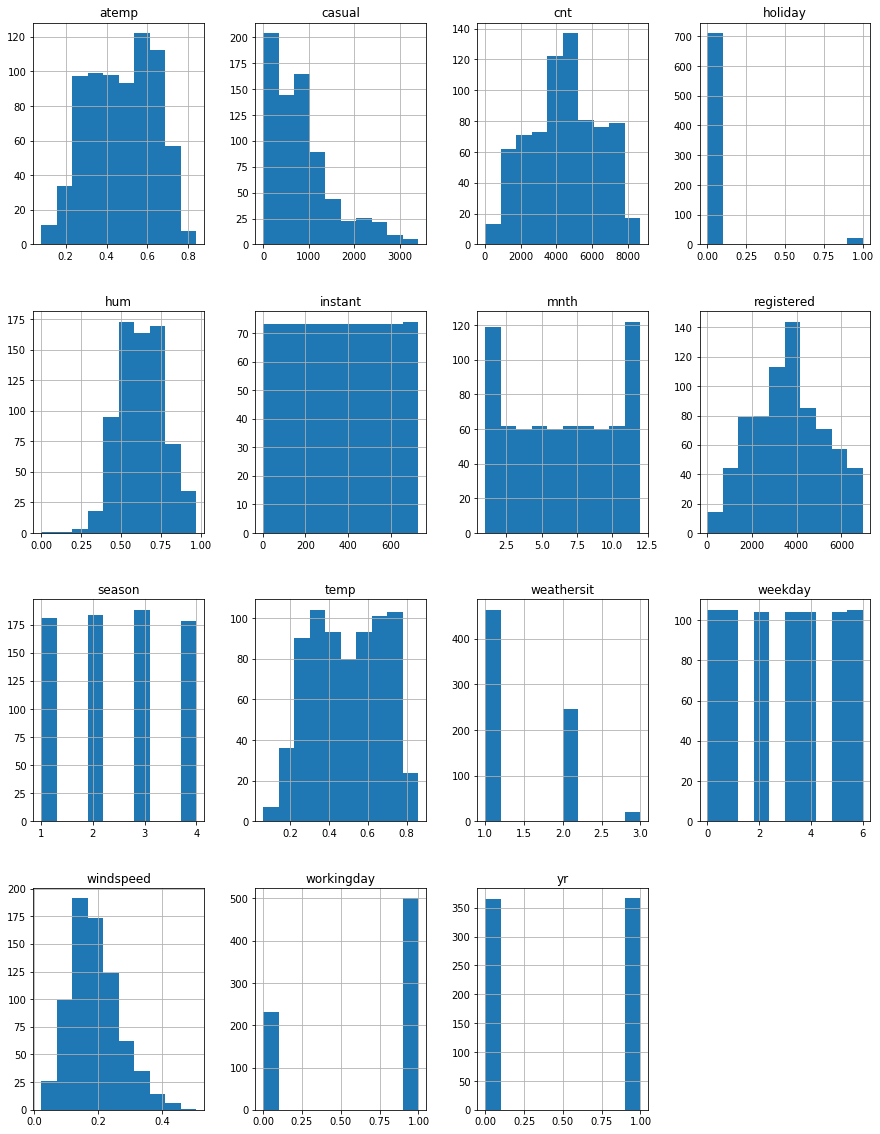

In [5]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = dfBike.hist(ax = ax, bins=10)

D:\Anaconda3\envs\EE219\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


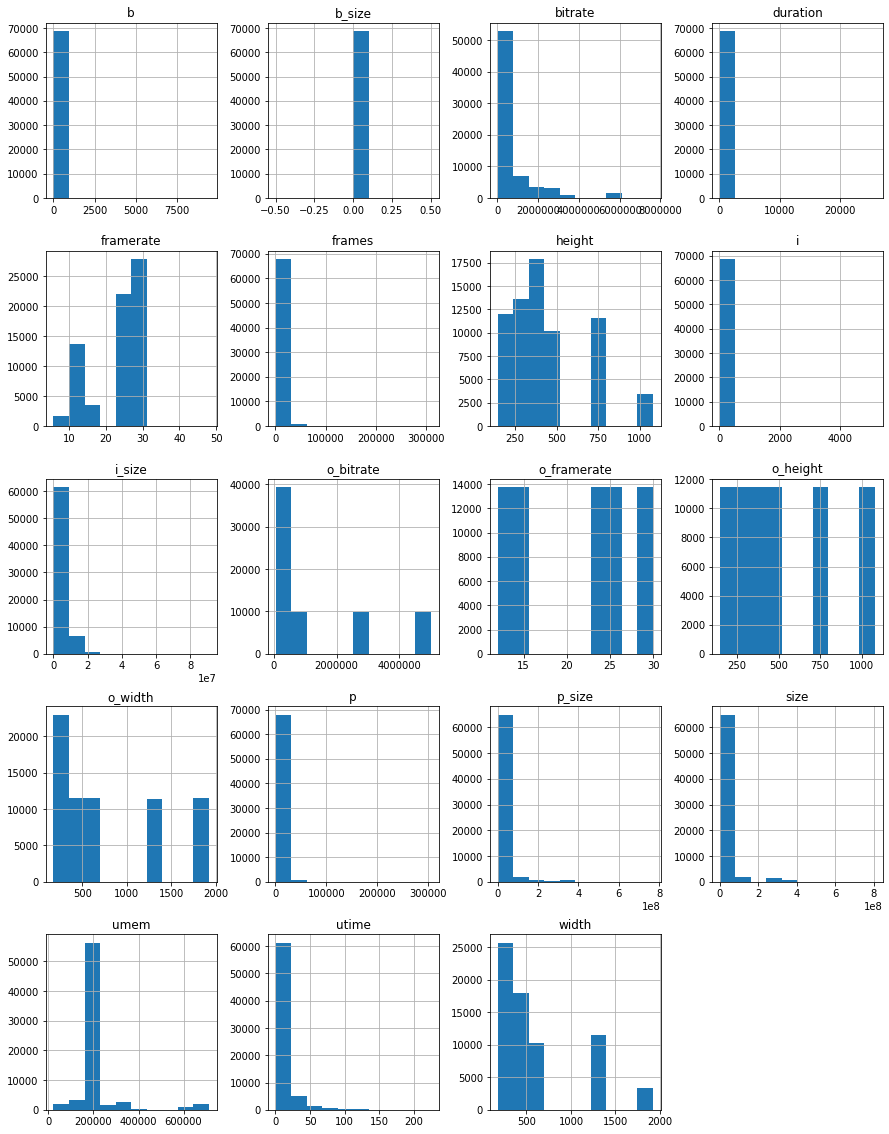

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = dfVid.hist(ax = ax, bins=10)

### Q3
Inspect box plot of categorical features vs target variable. What intuition do you
get?

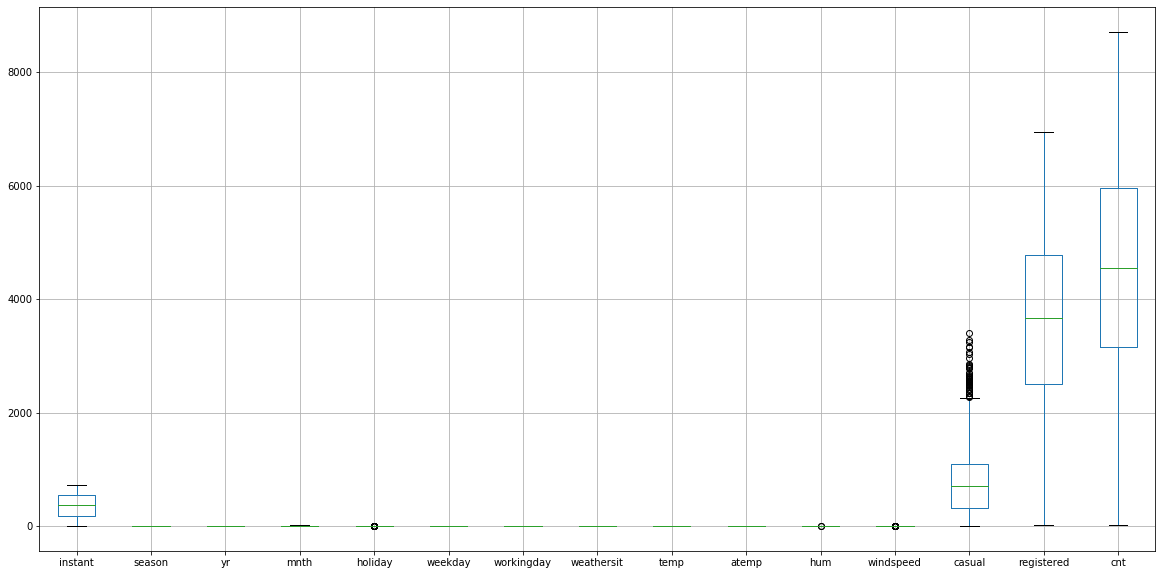

In [7]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
boxplot = dfBike.boxplot(ax = ax)

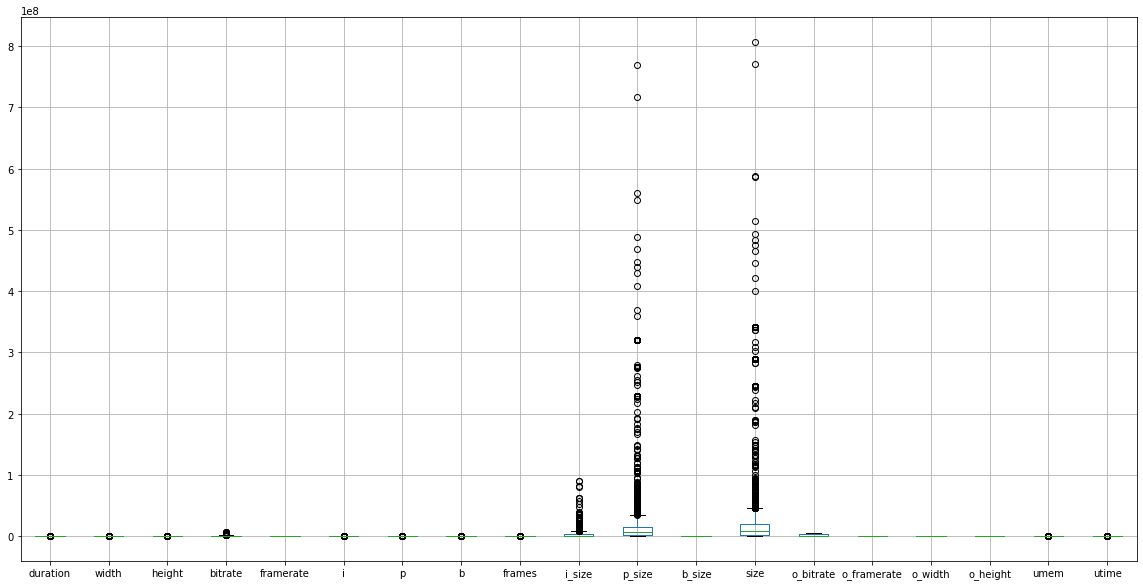

In [8]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
boxplot = dfVid.boxplot(ax = ax)

### Q4
For bike sharing dataset, plot the count number per day for a few months. Can you
identify any repeating patterns in every month?

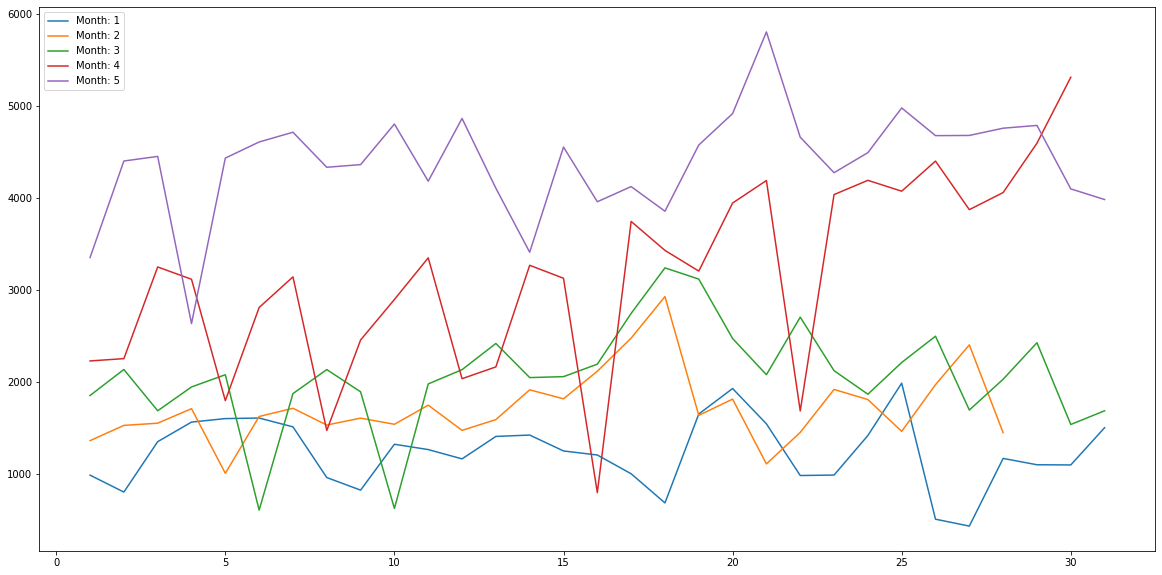

In [9]:
dfBikeMonths = dfBike
indexNames = dfBike[ (dfBikeMonths['mnth'] > 5) | (dfBike['instant'] >= 366)].index
dfBikeMonths = dfBike.drop(indexNames , inplace=False)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)

for i in np.arange(1,6):
    get = dfBikeMonths.loc[dfBikeMonths['mnth'] == i]['cnt']
    ax.plot(np.arange(1,len(get)+1),get, label='Month: ' + str(i))

ax.legend()
plt.show()

### Q5
For video transcoding time dataset, plot the distribution of video transcoding times,
what can you observe? Report mean and median transcoding times.

286.4139213595749
239.14166


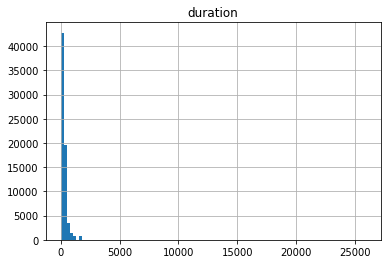

In [10]:
dfVid.hist(column = 'duration', bins=100)
print(np.mean(dfVid['duration']))
print(np.median(dfVid['duration']))

### Q6
A categorical feature is a feature that can take on one of a limited number of possible
values. A preprocessing step is to convert categorical variables into numbers and thus
prepared for training.

One method for numerical encoding of categorical features is to assign a scalar. For
instance, if we have a “Quality” feature with values {Poor, Fair, Typical, Good,
Excellent} we might replace them with numbers 1 through 5. If there is no numerical
meaning behind categorical features (e.g. {Cat, Dog}) one has to perform “one-hot
encoding” instead.

For some other cases, e.g. when encoding time stamps such as {Mon, ..., Sun} or
{Jan, ..., Dec} it might make sense to perform either one. In those cases the learning
algorithm of choice and numerical results can lead our way. Can you explain a trade-off
here? (Hint: let us assume we perform linear regression, what information does one-hot
encoding discard, and what assumption should hold strongly if we perform the scalar
encoding instead?)

### Q7
Standardize feature columns and prepare them for training.

In [15]:
dfBikeStandard = dfBike.drop(columns='dteday', inplace=False)

x = dfBikeStandard.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfBikeStandard=pd.DataFrame(x_scaled, columns=dfBikeStandard.columns)


In [19]:
dfVidStandard = dfVid.drop(columns=['id','codec','o_codec'], inplace=False)

x = dfVidStandard.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfVidStandard=pd.DataFrame(x_scaled, columns=dfVidStandard.columns)

### Q8
sklearn.feature_selection.mutual_info_regression function returns estimated mutual information between each feature and the label. Mutual information (MI) between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

sklearn.feature_selection.f_regression_function provides F scores, which is a way of comparing the significance of the improvement of a model, with respect to the addition of new variables.

You may use these functions to select most important features. How does this step affect the performance of your models in terms of test RMSE?

In [44]:
xVals = dfBikeStandard.values[:,:-3]
yVals = dfBikeStandard.values[:,-3:]

for i in np.arange(3):
    mi = mutual_info_regression(xVals,yVals[:,i])
    fval, _ = f_regression(xVals,yVals[:,i])
    print("mi vals: ", mi)
    print("fvals: ", fval)


mi vals:  [0.57500329 0.25784378 0.08612164 0.36488013 0.         0.17793993
 0.16373094 0.0825219  0.38634585 0.41151336 0.0564613  0.01803157]
fvals:  [ 59.76080298  33.76597821  47.99907687  11.19955141   2.15375168
   2.62706977 267.40499289  47.50957705 305.27467615 306.19920635
   4.34891601  21.07271914]
mi vals:  [0.77140722 0.20571647 0.28070157 0.27169013 0.00586745 0.11845389
 0.11194304 0.06560254 0.33833237 0.39074776 0.06883429 0.03225884]
fvals:  [561.49920964 148.71422518 397.96677458  68.71091442   8.7239138
   2.40707798  74.18146749  53.0225014  300.09839025 306.72420067
   6.09921653  36.1808572 ]
mi vals:  [0.90447761 0.21748291 0.27675788 0.37629188 0.01100029 0.04394003
 0.02267679 0.06473981 0.39015174 0.46515517 0.0462464  0.05468674]
fvals:  [476.81073992 143.96765259 344.89058554  62.00462455   3.42144104
   3.33109137   2.73674228  70.72929783 473.47171053 482.45431053
   7.46194     42.43784159]


In [46]:
xVals = dfVidStandard.values[:,:-2]
yVals = dfVidStandard.values[:,-2:]

for i in range(2):
    mi = mutual_info_regression(xVals,yVals[:,i])
    fval, _ = f_regression(xVals,yVals[:,i])
    print("mi vals: ", mi)
    print("fvals: ", fval)

D:\Anaconda3\envs\EE219\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
D:\Anaconda3\envs\EE219\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda3\envs\EE219\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda3\envs\EE219\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


mi vals:  [2.74789012 0.76725219 0.76410419 2.71836668 1.5118103  2.55935642
 2.75283496 0.0529822  2.75733445 2.74070399 2.72376888 0.
 2.72896341 0.14298866 0.0747872  0.15256466 0.15515221]
fvals:  [5.92585269e+00 8.48904998e+01 1.18388256e+02 1.28260260e+02
 2.45903812e+02 8.05750377e+01 6.73773754e+01 2.50060011e+00
 6.81037569e+01 8.89170426e+01 6.38794334e+01            nan
 6.84942677e+01 1.72706436e-01 3.22216106e-01 1.22154315e+04
 1.17564293e+04]
mi vals:  [0.31883778 0.14772539 0.14701506 0.32348842 0.18258189 0.29834038
 0.3279291  0.         0.32659942 0.31944642 0.32552299 0.00322996
 0.3248347  0.0199507  0.01643191 0.31546035 0.31154759]
fvals:  [2.10539899e+00 1.17982952e+03 1.15442164e+03 1.69764467e+03
 4.35670896e+02 2.35211437e+01 7.59007126e+01 1.81691098e+00
 7.55074542e+01 2.89241036e+02 6.62110205e+02            nan
 6.54620570e+02 1.70390279e+03 7.52702473e+02 2.59505189e+04
 2.54444032e+04]


D:\Anaconda3\envs\EE219\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
D:\Anaconda3\envs\EE219\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda3\envs\EE219\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda3\envs\EE219\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### Q9
Explain how each regularization scheme affects the learned hypotheses.

In [90]:
for i in range(3):
    xVals = dfBikeStandard.values[:,:-3]
    yVals = dfBikeStandard.values[:,-(i+1)]
    x_train, x_test, y_train, y_test=train_test_split(xVals,yVals,test_size=0.3,random_state=3)

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print('No normalization: ', lr.score(x_test, y_test), ' target: ', dfBikeStandard.columns[-(i+1)])
    
    goodAlpharr = 0
    goodScorerr = 0
    goodAlphall = 0
    goodScorell = 0
    for alpha in np.arange(1,100):
        rr = Ridge(alpha=alpha*0.01) #  comparison with alpha value
        rr.fit(x_train, y_train)
        if(rr.score(x_test, y_test) > goodScorerr):
            goodScorerr = rr.score(x_test, y_test)
            goodAlpharr = alpha
        ll = Lasso(alpha = alpha*0.01, max_iter=10e5)
        ll.fit(x_train, y_train)
        if(ll.score(x_test, y_test) > goodScorell):
            goodScorell = ll.score(x_test, y_test)
            goodAlphall = alpha
    print('Ridge regression: ', goodScorerr, ' alpha: ', goodAlpharr*0.01, ' target: ', dfBikeStandard.columns[-(i+1)])
    print('Lasso regression: ', goodScorell, ' alpha: ', goodAlphall*0.01, ' target: ', dfBikeStandard.columns[-(i+1)])

No normalization:  0.7761849078908872  target:  cnt
Ridge regression:  0.7929351068775079  alpha:  0.45  target:  cnt
Lasso regression:  0.6918714852232611  alpha:  0.01  target:  cnt
No normalization:  0.8096207343757216  target:  registered
Ridge regression:  0.8193346926391195  alpha:  0.38  target:  registered
Lasso regression:  0.7203497084508195  alpha:  0.01  target:  registered
No normalization:  0.6370516305137024  target:  casual
Ridge regression:  0.6584163086772565  alpha:  0.7000000000000001  target:  casual
Lasso regression:  0.5546839311636584  alpha:  0.01  target:  casual


In [91]:
for i in range(2):
    xVals = dfVidStandard.values[:,:-2]
    yVals = dfVidStandard.values[:,-(i+1)]
    x_train, x_test, y_train, y_test=train_test_split(xVals,yVals,test_size=0.3,random_state=3)

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print('No normalization: ', lr.score(x_test, y_test), ' target: ', dfVidStandard.columns[-(i+1)])
    
    goodAlpharr = 0
    goodScorerr = 0
    goodAlphall = 0
    goodScorell = 0
    for alpha in np.arange(1,100):
        rr = Ridge(alpha=alpha*0.01) #  comparison with alpha value
        rr.fit(x_train, y_train)
        if(rr.score(x_test, y_test) > goodScorerr):
            goodScorerr = rr.score(x_test, y_test)
            goodAlpharr = alpha
        ll = Lasso(alpha = alpha*0.01, max_iter=10e5)
        ll.fit(x_train, y_train)
        if(ll.score(x_test, y_test) > goodScorell):
            goodScorell = ll.score(x_test, y_test)
            goodAlphall = alpha
    print('Ridge regression: ', goodScorerr, ' alpha: ', goodAlpharr*0.01, ' target: ', dfVidStandard.columns[-(i+1)])
    print('Lasso regression: ', goodScorell, ' alpha: ', goodAlphall*0.01, ' target: ', dfVidStandard.columns[-(i+1)])

No normalization:  0.3385701372289041  target:  utime
Ridge regression:  0.3385219060398832  alpha:  0.4  target:  utime
Lasso regression:  0.112405988702869  alpha:  0.01  target:  utime
No normalization:  0.15744083419634558  target:  umem
Ridge regression:  0.15726892002662074  alpha:  0.01  target:  umem
Lasso regression:  0.11104755512193909  alpha:  0.01  target:  umem


### Q10
Report your choice of the best regularization scheme along with the optimal penalty parameter and briefly explain how it can be computed. 

### Q11
Does feature scaling play any role (in the cases with and without regularization)? Justify your answer. 

### Q12
Some linear regression packages return p-values for different features. What is the meaning of them and how can you infer the most significant features?